# Coffee Sales Visualization
This project is a simple visualization of coffee sales data to test my skills with pandas, matplotlib, and seaborn.
As someone who enjoys coffee, I thought it would be a fun project to work on.

The dataset source is from [Kaggle](https://www.kaggle.com/datasets/navjotkaushal/coffee-sales-dataset/data)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
coffee_sales = pd.read_csv('Coffee_sales.csv')

In [4]:
print(coffee_sales.head())
print(coffee_sales.info())
print(coffee_sales.describe())

   hour_of_day cash_type  money    coffee_name Time_of_Day Weekday Month_name  \
0           10      card   38.7          Latte     Morning     Fri        Mar   
1           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
2           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
3           13      card   28.9      Americano   Afternoon     Fri        Mar   
4           13      card   38.7          Latte   Afternoon     Fri        Mar   

   Weekdaysort  Monthsort        Date             Time  
0            5          3  2024-03-01  10:15:50.520000  
1            5          3  2024-03-01  12:19:22.539000  
2            5          3  2024-03-01  12:20:18.089000  
3            5          3  2024-03-01  13:46:33.006000  
4            5          3  2024-03-01  13:48:14.626000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ----

Lets first find out which month has the highest total sales of coffee.

In [5]:
best_performing_month = coffee_sales.groupby(["Month_name"])["money"].sum().reset_index().max()
print(best_performing_month)

Month_name         Sep
money         15891.64
dtype: object


Now lets group the data by the month and visualize the sales by month.

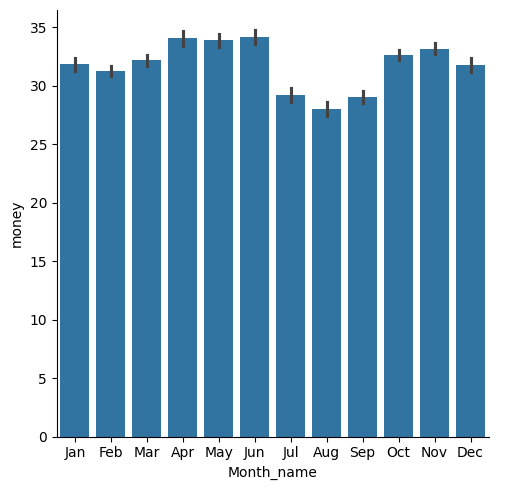

In [ ]:
month_order = ["Jan","Feb","Mar","Apr",'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

sns.catplot(x="Month_name",y="money",data=coffee_sales,kind="bar",estimator=sum,order=month_order)
plt.show()

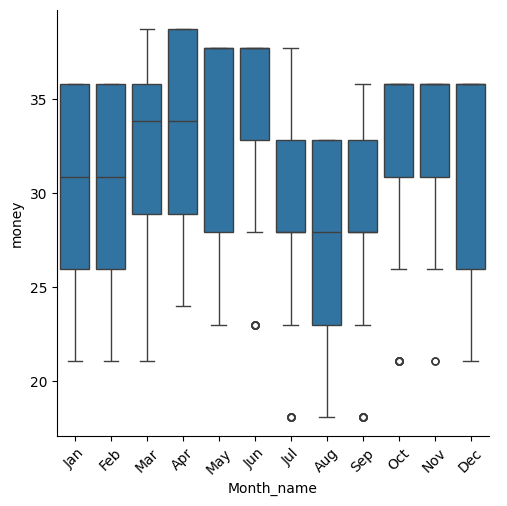

In [37]:
sns.catplot(x='Month_name',y='money',data=coffee_sales,kind='box',order=month_order,estimator=sum)
plt.xticks(rotation=45)
plt.show()

Lets first determine which coffee type is the most popular at our shop

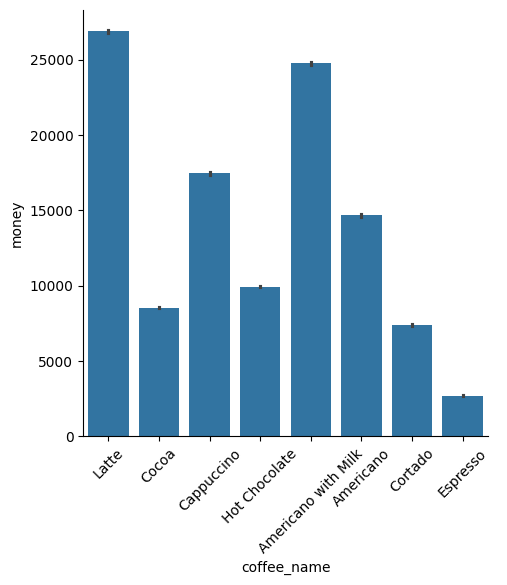

In [38]:
sns.catplot(x='coffee_name',y='money',data=coffee_sales.sort_values(by="money",ascending=False),kind="bar",estimator=sum)
plt.xticks(rotation=45)

plt.show()

It seems that Latte, Coca, Cappuccino and Hot Chocolate are the most popular types of Coffee, lets now check the best performing day of the week


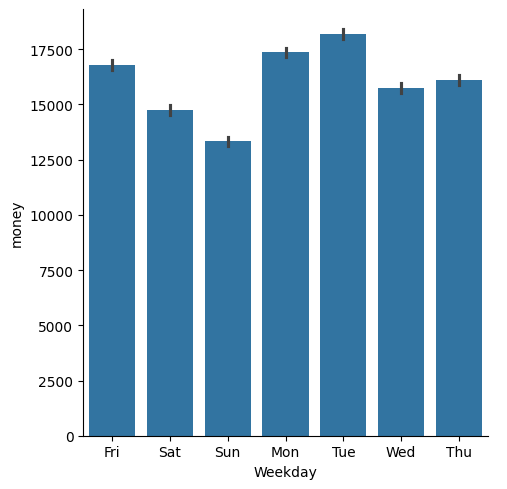

In [39]:
sns.catplot(x="Weekday",y="money",data=coffee_sales,kind="bar",estimator=sum)